In [111]:

import pandas as pd
from nltk.stem import PorterStemmer, WordNetLemmatizer
import nltk
nltk.download('wordnet')
import numpy as np
import math
import matplotlib.pyplot as plt
import re
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
nltk.download('punkt')
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### clean keywords

In [112]:
pathfire='/content/drive/My Drive/Project Fire/Kopie von disaster_tweets.csv'
df = pd.read_csv(pathfire)
df

# cleaning process

df.drop('id',inplace=True, axis = 1)
print("Unterschiedliche Keywords vor cleaning: ",df.keyword.nunique())
df_unique=pd.DataFrame(data=df.keyword.unique(),  columns=["col1"])
df_unique.dropna(inplace=True)

stemmer = PorterStemmer()
df_unique['keyword_stem']=df_unique['col1'].apply(lambda x: stemmer.stem(x))


print("Unterschiedliche Keywords nach stemming: ",df_unique.keyword_stem.nunique())
df_unique.keyword_stem.unique()


# manuelles vereinheitlichen
einheits_dict={'burning%20build':'fire',
               'buildings%20burn':'fire',
               'buildings%20on%20fir':'fire',
               'bloodi': 'blood',
               'bleed': 'blood',
               'bush%20fir':'fire',
               'dead':'death',
               'explod':'explos',
               'blown%20up':'explos',
               'bridge%20collaps':'damag',
               'demolish':'damag',
               'demolit':'damag',
               'injuri':'injur',
               'apocalyps':'catastroph',
               'armageddon':'catastroph',
               'arsonist':'arson',
               'mass%20murder':'mass%20murd',
               'panick':'panic',
               'disast':'catastroph',
               'armi':'militari',
               'earthquak':'catastroph',
               'hellfir':'fire',
               'tornado':'hurrican',
               'cyclon':'hurrican',
               'terrorist':'terror',
               'nuclear%20disast':'meltdown',
               'tsunami':'flood',
               'surviv': 'survivor',
               'traumatis':'trauma',
               'wild%20fir': 'wildfir',
               'twister':'hurrican',
               'typhoon':'hurrican',
               'suicide%20bomb':'bomb',
               'whirlwind':'hurrican',
               'blizzard':'hurican',
               'collid':'collis',
               'destruct':'destroy',
               'devast':'destroy',
               'mass%20murd':'massacr',
               'crash':'crush',
               'sunk':'sink',
               'lava':'volcano'
               }


df_unique['keywords_final']=df_unique['keyword_stem'].replace(einheits_dict)

print("Unterschiedliche Keywords nach stemming und manuellem einsortieren: ",df_unique.keywords_final.nunique())
df_unique.keywords_final.unique()


Unterschiedliche Keywords vor cleaning:  221
Unterschiedliche Keywords nach stemming:  166
Unterschiedliche Keywords nach stemming und manuellem einsortieren:  126


array(['ablaz', 'accid', 'aftershock', 'airplane%20accid', 'ambul',
       'annihil', 'catastroph', 'militari', 'arson', 'attack', 'avalanch',
       'battl', 'bioterror', 'blaze', 'blood', 'blew%20up', 'blight',
       'hurican', 'explos', 'body%20bag', 'bomb', 'damag', 'fire', 'burn',
       'casualti', 'chemical%20emerg', 'cliff%20fal', 'collaps', 'collis',
       'crush', 'curfew', 'hurrican', 'danger', 'death', 'debri', 'delug',
       'derail', 'desol', 'destroy', 'deton', 'displac', 'drought',
       'drown', 'dust%20storm', 'electrocut', 'emerg', 'emergency%20plan',
       'emergency%20servic', 'engulf', 'epicentr', 'evacu', 'eyewit',
       'famin', 'fatal', 'fear', 'fire%20truck', 'first%20respond',
       'flame', 'flatten', 'flood', 'forest%20fir', 'hail', 'hailstorm',
       'harm', 'hazard', 'heat%20wav', 'hijack', 'hostag', 'injur',
       'inund', 'landslid', 'volcano', 'lightn', 'loud%20bang', 'massacr',
       'mass%20murd', 'mayhem', 'meltdown', 'mudslid', 'natural%2

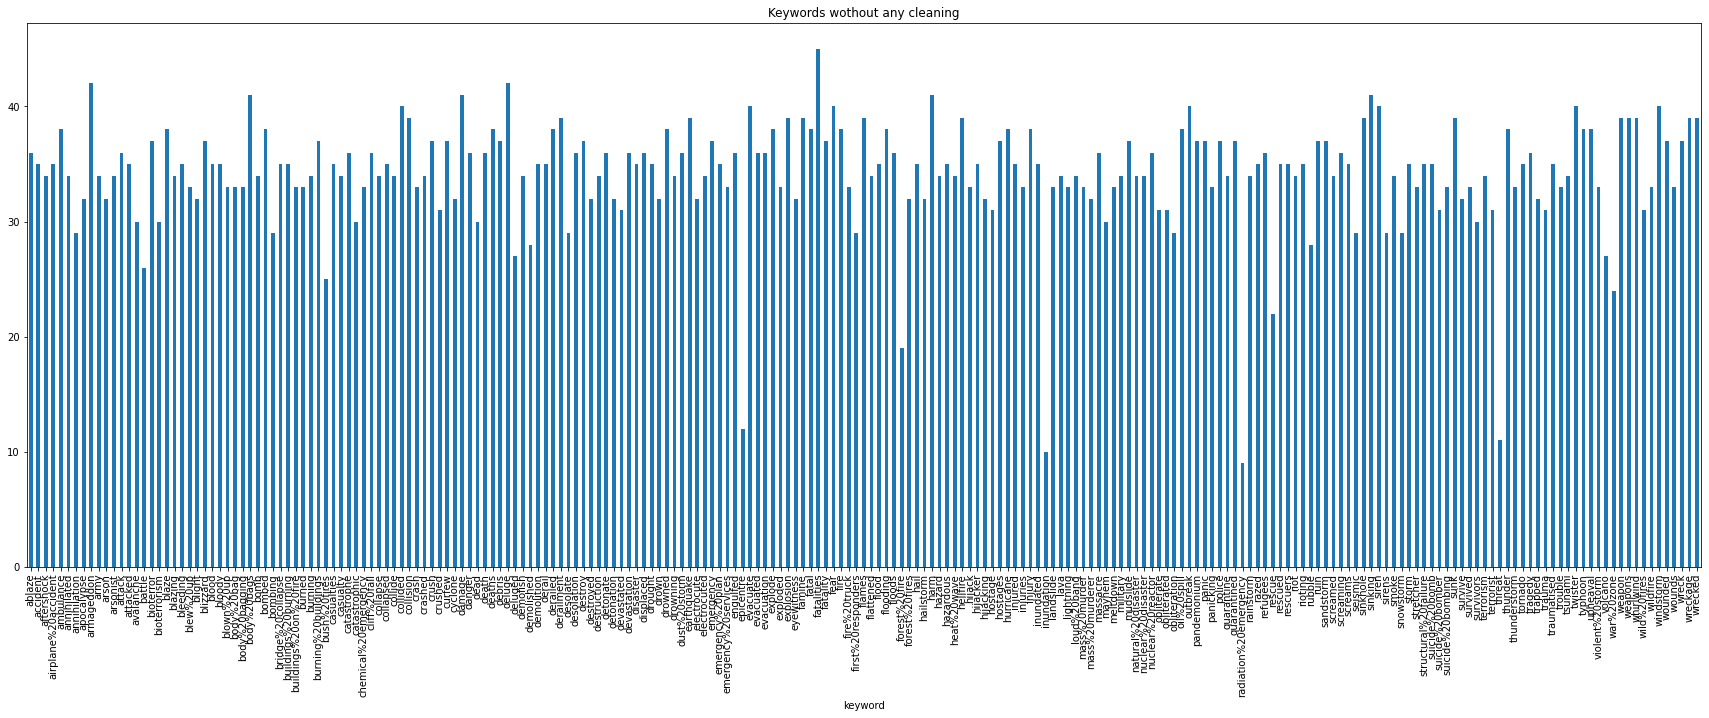

In [113]:


plt.figure(figsize=(30,10))
df.groupby('keyword')['keyword'].count().plot(kind='bar')
plt.title('Keywords wothout any cleaning')
plt.show()

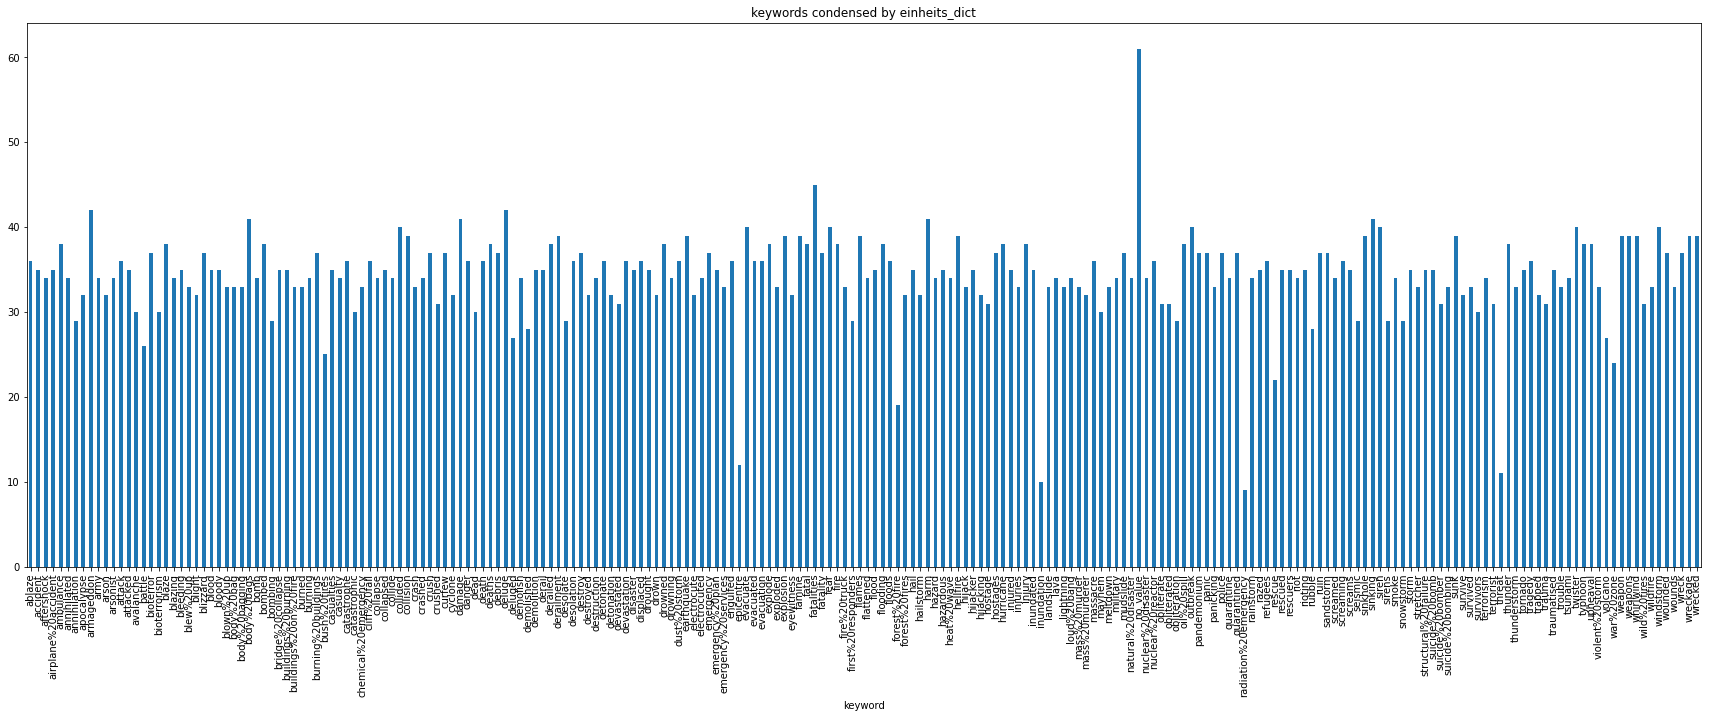

In [114]:
import numpy as np
import math
df.fillna('no_value',inplace=True)
df['keyword_stem']=df['keyword'].apply(lambda x: stemmer.stem(x))
df['keywords_final']=df['keyword_stem'].replace(einheits_dict)
plt.figure(figsize=(30,10))
df.groupby('keyword')['keyword'].count().plot(kind='bar')
plt.title("keywords condensed by einheits_dict")
plt.show()

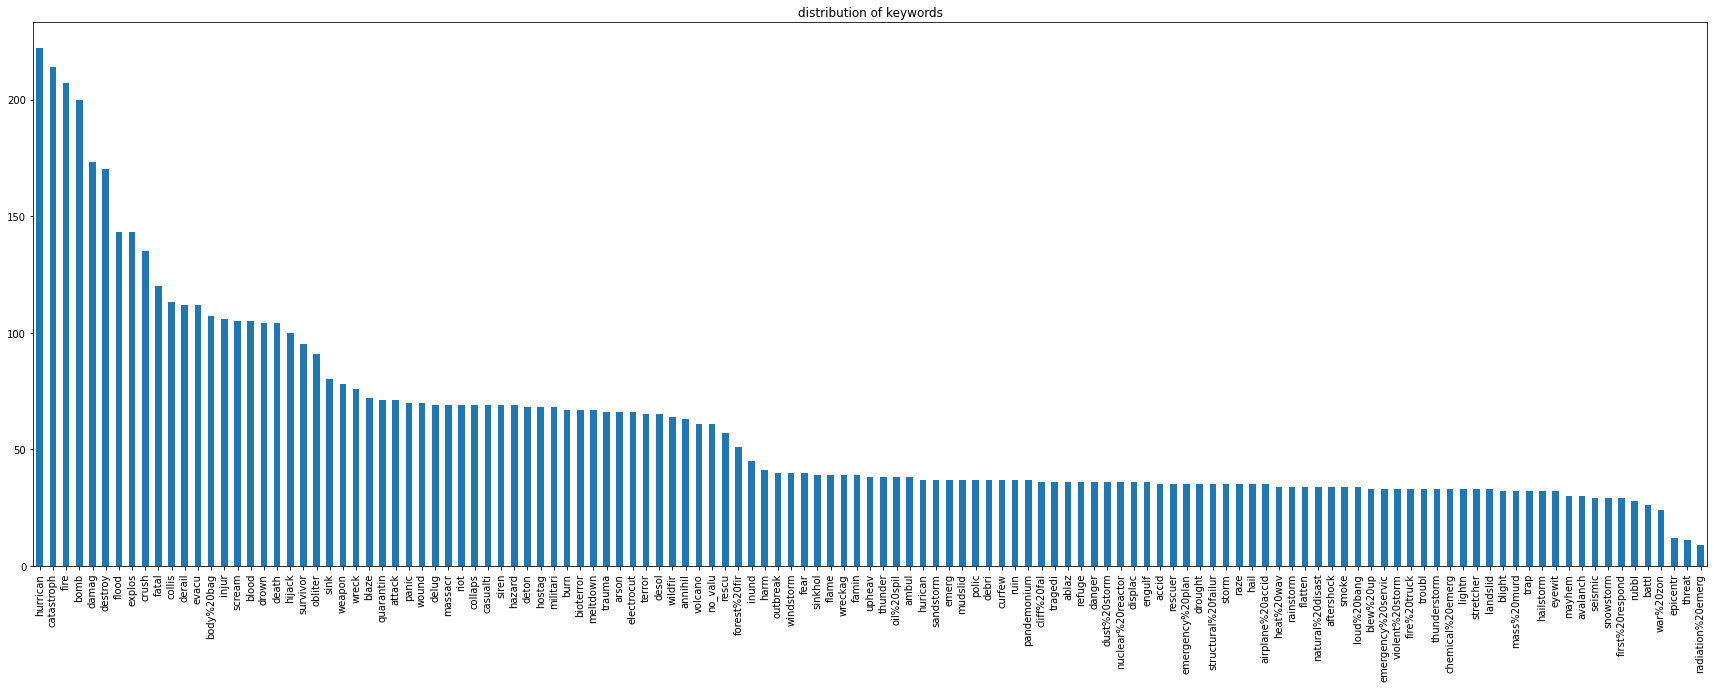

In [115]:
plt.figure(figsize=(30,10))
df['keywords_final'].value_counts().plot(kind='bar')

plt.title("distribution of keywords")
plt.show()

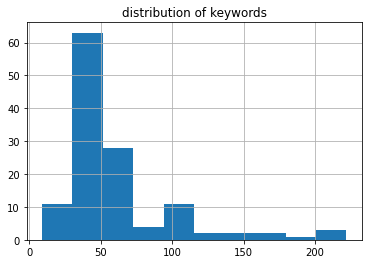

In [116]:
df['keywords_final'].value_counts().hist()
plt.title("distribution of keywords")
plt.show()

### clean text

In [117]:
# text cleaning

df.text

0       Our Deeds are the Reason of this #earthquake M...
1                  Forest fire near La Ronge Sask. Canada
2       All residents asked to 'shelter in place' are ...
3       13,000 people receive #wildfires evacuation or...
4       Just got sent this photo from Ruby #Alaska as ...
                              ...                        
7608    Two giant cranes holding a bridge collapse int...
7609    @aria_ahrary @TheTawniest The out of control w...
7610    M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...
7611    Police investigating after an e-bike collided ...
7612    The Latest: More Homes Razed by Northern Calif...
Name: text, Length: 7613, dtype: object

In [371]:
# erase punctuation

def clean_text(text):
  # get rid of all unwanted punctuation and digits
  text = text.replace("´", "'")

  digi_punct = "[^a-zA-Z ]"
  text = re.sub(digi_punct, " ", text)

  text = " ".join(text.split())

  text = text.lower()

  return text

In [372]:

df['clean']=df['text'].apply(lambda text: clean_text(text))
#df['keywords_final'].str.replace('no_valu', '', )
df['clean_keyword'] = df['clean']+ ' ' +  df['keywords_final'].str.replace('no_valu', '')
 

In [373]:
df.loc[0,'clean_keyword'][-11:]

'ive us all '

In [374]:
df['clean']


0       our deeds are the reason of this earthquake ma...
1                   forest fire near la ronge sask canada
2       all residents asked to shelter in place are be...
3       people receive wildfires evacuation orders in ...
4       just got sent this photo from ruby alaska as s...
                              ...                        
7608    two giant cranes holding a bridge collapse int...
7609    aria ahrary thetawniest the out of control wil...
7610    m utc km s of volcano hawaii http t co zdtoyd ebj
7611    police investigating after an e bike collided ...
7612    the latest more homes razed by northern califo...
Name: clean, Length: 7613, dtype: object

In [375]:
# stemmer & stopwords

my_stopwords = stopwords.words('english')

df["clean"] = df["clean"].apply(
    lambda text: " ".join([stemmer.stem(word) for word in text.split() if word not in my_stopwords]))
df["clean_keyword"] = df["clean_keyword"].apply(
    lambda text: " ".join([stemmer.stem(word) for word in text.split() if word not in my_stopwords]))

In [376]:
df_test = pd.get_dummies(df.keywords_final)
#titanic_enc = pd.concat([titanic_enc, pd.get_dummies(titanic_enc[["Sex", "Embarked"]], drop_first=True)], axis=1).drop(columns=["Sex", "Embarked"])
#titanic_enc.head()
df_he = pd.concat([df, df_test], axis=1)

In [377]:
df_he.head(3)

,keyword,location,text,target,keyword_stem,keywords_final,clean,clean_keyword,NB_target,accurate,numkeyword,ablaz,accid,aftershock,airplane%20accid,ambul,annihil,arson,attack,avalanch,battl,bioterror,blaze,blew%20up,blight,blood,body%20bag,bomb,burn,casualti,catastroph,chemical%20emerg,cliff%20fal,collaps,collis,crush,curfew,damag,danger,death,...,quarantin,radiation%20emerg,rainstorm,raze,refuge,rescu,rescuer,riot,rubbl,ruin,sandstorm,scream,seismic,sink,sinkhol,siren,smoke,snowstorm,storm,stretcher,structural%20failur,survivor,terror,threat,thunder,thunderstorm,tragedi,trap,trauma,troubl,upheav,violent%20storm,volcano,war%20zon,weapon,wildfir,windstorm,wound,wreck,wreckag
0,no_value,no_value,Our Deeds are the Reason of this #earthquake M...,1,no_valu,no_valu,deed reason earthquak may allah forgiv us,deed reason earthquak may allah forgiv us,1,1,79,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,no_value,no_value,Forest fire near La Ronge Sask. Canada,1,no_valu,no_valu,forest fire near la rong sask canada,forest fire near la rong sask canada,1,1,79,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,no_value,no_value,All residents asked to 'shelter in place' are ...,1,no_valu,no_valu,resid ask shelter place notifi offic evacu she...,resid ask shelter place notifi offic evacu she...,1,1,79,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Define Train & Test Data

In [378]:
from sklearn.model_selection import train_test_split
import numpy as np

# for text and keywords combined only use:
#X = df['clean_keyword']

# for text only use:
X = df['clean']


y = df.target

X_train, X_test, y_train, y_test = train_test_split(X,y, stratify = y, test_size=0.2, random_state=42)
print(X_train.shape, y_train.shape, X_test.shape,y_test.shape)

(6090,) (6090,) (1523,) (1523,)


Select Vectorizer

In [379]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

count_vectorizer = CountVectorizer()
bag_of_words = count_vectorizer.fit_transform(X_train)

In [380]:
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(X_train)

In [381]:
tfidf_matrix

<6090x16217 sparse matrix of type '<class 'numpy.float64'>'
	with 65861 stored elements in Compressed Sparse Row format>

MODEL Logistic Regression /TFIDF Vectorizer

In [382]:
from sklearn.model_selection import cross_val_score

def pred_scores(model):
  model.fit(X_train, y_train)
  print(f"Model: {model}\n")
  print(f"Training set score: {model.score(X_train, y_train)}")
  print(f"CV score          : {cross_val_score(model, X_train, y_train, cv=5).mean()}")

In [383]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.pipeline import make_pipeline
#pipe_tfidf = make_pipeline(TfidfVectorizer(),LogisticRegressionCV())
#cross_val_score(pipe_tfidf, X_train, y_train).mean()

#pipe_tfidf.fit(X_train, y_train)
#plot_confusion_matrix(pipe_tfidf,X_test,y_test, normalize='true')
#plt.title('pred for countV & LogReg')

In [384]:
pipe_tfidf.get_params

<bound method Pipeline.get_params of Pipeline(memory=None,
         steps=[('tfidfvectorizer',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token...\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('logisticregressioncv',
                 LogisticRegressionCV(Cs=10, class_weight=None, cv=None,
                            

MODEL Logistic Regression /TFIDF Vectorizer

In [385]:
pipe_count = make_pipeline(CountVectorizer(),LogisticRegression())
cv_LR = cross_val_score(pipe_count, X_train, y_train).mean()
pipe_count.fit(X_train, y_train)
LR_Score = pipe_count.score(X_test, y_test)
s_predcit_LR = pipe_count.predict(X_test)

print(cv_LR, LR_Score )
pred_scores(pipe_count)

0.7922824302134647 0.8115561391989494
Model: Pipeline(memory=None,
         steps=[('countvectorizer',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('logisticregression',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                        

Text(0.5, 1.0, 'pred for countV & LogReg')

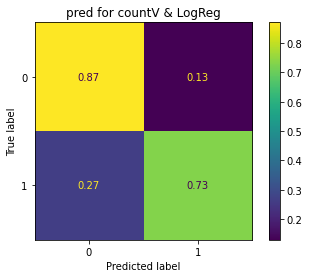

In [386]:
from sklearn.metrics import plot_confusion_matrix

pipe_count.fit(X_train, y_train)
plot_confusion_matrix(pipe_count,X_test,y_test, normalize='true')
plt.title('pred for countV & LogReg')


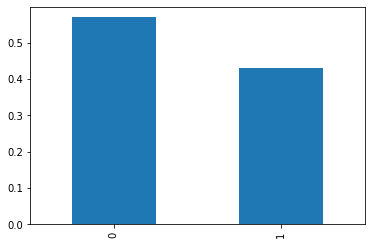

In [387]:
# distribution of y

df.target.value_counts(normalize=True).plot(kind='bar')

### new approach: Day2

MODEL XGBOOST Classifier

In [135]:
!pip install xgboost

0.7334975369458128
Model: Pipeline(memory=None,
         steps=[('tfidfvectorizer',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token...
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0, learning_rate=0.1,
                               max_delta_step=0, max_depth=3

Text(0.5, 1.0, 'pred for tfidf & XGB')

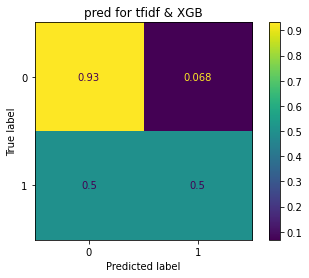

In [388]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from xgboost import XGBClassifier
pipe_tfidf_xgb = make_pipeline(TfidfVectorizer(),XGBClassifier())
cv_XGB = cross_val_score(pipe_tfidf_xgb, X_train, y_train).mean()
pipe_tfidf_xgb = pipe_tfidf_xgb.fit(X_train, y_train)
XGB_Score = pipe_tfidf_xgb.score(X_test, y_test)
s_predcit_XGB = pipe_tfidf_xgb.predict(X_test)

print(cv_XGB)

print(pred_scores(pipe_tfidf_xgb))

pipe_tfidf_xgb.fit(X_train, y_train)
plot_confusion_matrix(pipe_tfidf_xgb,X_test,y_test, normalize='true')
plt.title('pred for tfidf & XGB')

In [137]:
import numpy as np

param_grid = {
    "XGB__n_estimators": [50, 100],
    "XGB__max_depth": [5, 10, 25],
    "XGB__reg_alpha": [1, 1.3, 2],
    "XGB__reg_lamba": [1, 1.3, 2],
    "XGB__subsample": np.arange(0.8, 1.1, 0.2)
}

MODEL Gridsearch + XGB

In [138]:
"""
from sklearn.model_selection import GridSearchCV


from sklearn.pipeline import Pipeline

pipe = Pipeline(steps=[('tfidf', TfidfVectorizer()), ('XGB', XGBClassifier())])


#xgbc = XGBClassifier()
gridsearch = GridSearchCV(pipe, param_grid, verbose=1, n_jobs=-1)
gridsearch.fit(X_train, y_train)

gridsearch.best_score_
"""

"\nfrom sklearn.model_selection import GridSearchCV\n\n\nfrom sklearn.pipeline import Pipeline\n\npipe = Pipeline(steps=[('tfidf', TfidfVectorizer()), ('XGB', XGBClassifier())])\n\n\n#xgbc = XGBClassifier()\ngridsearch = GridSearchCV(pipe, param_grid, verbose=1, n_jobs=-1)\ngridsearch.fit(X_train, y_train)\n\ngridsearch.best_score_\n"

MODEL Decistion Tree

0.7507389162561576 0.7583716349310571
Model: Pipeline(memory=None,
         steps=[('countvectorizer',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, voc...y=None)),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                        criterion='gini', max_depth=None,
                                        max_features=None, max_leaf_nodes=None,
           

Text(0.5, 1.0, 'pred for tfidf & DT')

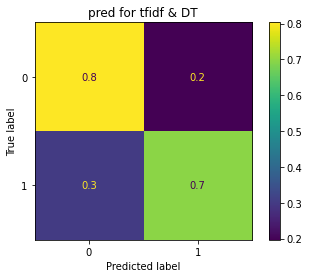

In [389]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline
pipe_tfidf_DT = make_pipeline(CountVectorizer(),DecisionTreeClassifier())
cv_dt = cross_val_score(pipe_tfidf_DT, X_train, y_train).mean()
pipe_tfidf_DT.fit(X_train, y_train)
DT_Score = pipe_tfidf_DT.score(X_test, y_test)
s_predcit_DT = pipe_tfidf_DT.predict(X_test)

print(cv_dt, DT_Score)
pred_scores(pipe_tfidf_DT)

plot_confusion_matrix(pipe_tfidf_DT,X_test,y_test, normalize='true')
plt.title('pred for tfidf & DT')

MODEL KNN

In [390]:
from sklearn.neighbors import (KNeighborsClassifier,
                               NeighborhoodComponentsAnalysis)
pipe_tfidf_KN = make_pipeline(CountVectorizer(),KNeighborsClassifier(n_neighbors=5))
cv_KN = cross_val_score(pipe_tfidf_KN, X_train, y_train).mean()

pipe_tfidf_KN.fit(X_train, y_train)

KN_Score = pipe_tfidf_KN.score(X_test, y_test)
s_predcit_KN = pipe_tfidf_KN.predict(X_test)

print(cv_KN, KN_Score)

pred_scores(pipe_tfidf_KN)

0.6729064039408866 0.6887721602101117
Model: Pipeline(memory=None,
         steps=[('countvectorizer',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('kneighborsclassifier',
                 KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                      metric='minkowski', metric_params=None,
                                      n_jobs=None, n_neighbors=5, p=2,
                   

MODEL Naive Bayes /TFIDF Vectorizer

Crossvalidation: 0.7904761904761904 Test_Score 0.8207485226526592
Model: Pipeline(memory=None,
         steps=[('tfidfvectorizer',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('multinomialnb',
                 MultinomialNB(alpha=1.0, class_prior=

Text(0.5, 1.0, 'pred for tfidf & NAIVE_Bayes')

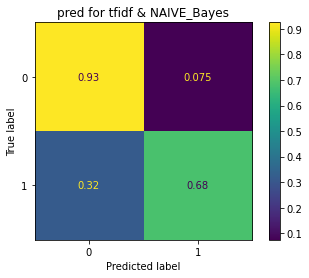

In [391]:

from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB


pipe_Bay = make_pipeline(TfidfVectorizer(), MultinomialNB(fit_prior=True))
cvs = cross_val_score(pipe_Bay, X_train, y_train).mean()
pipe_Bay.fit(X_train, y_train)

score_Bay = pipe_Bay.score(X_test, y_test)
s_predcit = pipe_Bay.predict(X_test)

print('Crossvalidation:', cvs, 'Test_Score', score_Bay)
print(pred_scores(pipe_Bay))

plot_confusion_matrix(pipe_Bay,X_test,y_test, normalize='true')
plt.title('pred for tfidf & NAIVE_Bayes')

In [392]:
df['NB_target'] = pipe_Bay.predict(X)
df
b= confusion_matrix(df.target, df.NB_target)
b

array([[4184,  158],
       [ 743, 2528]])

Accuracy of NAIVE BAYES Classifier for different Tweet Kexwords

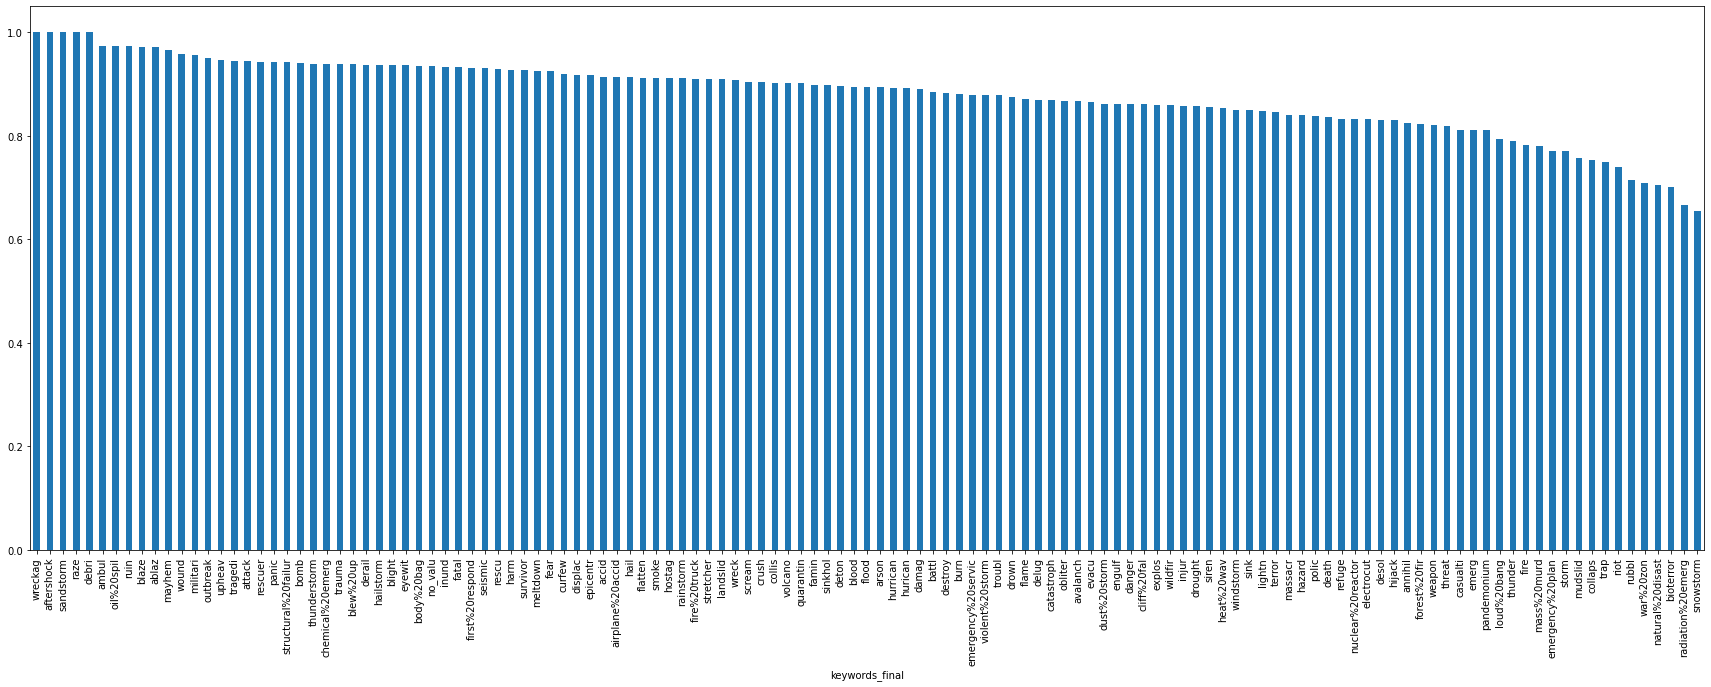

In [393]:
import numpy as np
import pandas as pd
df['accurate'] = np.where(df.target == df.NB_target, 1, 0)
df_keywords = df.groupby('keywords_final')['accurate'].agg(['sum', 'count'])
df_keywords['accuracy'] = df_keywords['sum'] / df_keywords['count']
plt.figure(figsize=(30,10))
#df_keywords['accuracy'].nsmallest(160).plot(kind='bar')
df_keywords['accuracy'].nlargest(160).plot(kind='bar')

MODEL  Voting (Logistic Regresiion and NAIVE BAYES)

0.814182534471438 0.7912972085385878


Text(0.5, 1.0, 'pred for tfidf & NAIVE_Bayes')

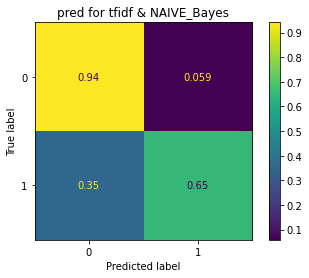

In [394]:
from sklearn.ensemble import  VotingClassifier
from sklearn.pipeline import Pipeline
model = Pipeline([
        ('tfidf', TfidfVectorizer()),    
        ('clf', VotingClassifier(estimators=[("pip1", MultinomialNB(fit_prior=True)), 
                                             ("pip2", LogisticRegression()),]))
    ])
cvs = cross_val_score(model, X_train, y_train).mean()
model.fit(X_train, y_train)
score_vot = model.score(X_test, y_test)
pred_vot = model.predict(X_test)
print(score_vot, cvs)

plot_confusion_matrix(model,X_test,y_test, normalize='true')
plt.title('pred for tfidf & NAIVE_Bayes')

Pickeling the best model

In [145]:
import pickle
filename = 'Bayes.sav'
model = pipe_Bay
pickle.dump(model, open(filename, 'wb'))

loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
atze = loaded_model.predict(X_test)
print(atze)

[1 0 1 ... 0 0 0]


New tweet prediction with best model (NAIVE BAYES)

In [146]:

tweet = 'I cant have kids cuz I got in a bicycle accident &amp; split my testicles. its impossible for me to have kids MICHAEL YOU ARE THE FATHER'
ct = clean_text(tweet)
my_stopwords = stopwords.words('english')

sw = " ".join([stemmer.stem(word) for word in ct.split() if word not in my_stopwords])
tfidf_vectorizer = TfidfVectorizer()

tfidf_matrix = tfidf_vectorizer.fit(X)



loaded_model = pickle.load(open('Bayes.sav', 'rb'))

sw = [sw]
vorhersage = loaded_model.predict(sw)
print(tweet, vorhersage)

I cant have kids cuz I got in a bicycle accident &amp; split my testicles. its impossible for me to have kids MICHAEL YOU ARE THE FATHER [0]


Numeric encoding for Tweet-Keywords

In [147]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
texte = df.keywords_final
le.fit(texte)

le.classes_

numkeyword = le.fit_transform(texte)

df['numkeyword'] = numkeyword
df

,keyword,location,text,target,keyword_stem,keywords_final,clean,clean_keyword,NB_target,accurate,numkeyword
0,no_value,no_value,Our Deeds are the Reason of this #earthquake M...,1,no_valu,no_valu,deed reason earthquak may allah forgiv us,deed reason earthquak may allah forgiv us,1,1,79
1,no_value,no_value,Forest fire near La Ronge Sask. Canada,1,no_valu,no_valu,forest fire near la rong sask canada,forest fire near la rong sask canada,1,1,79
2,no_value,no_value,All residents asked to 'shelter in place' are ...,1,no_valu,no_valu,resid ask 'shelter place' notifi offic evacu s...,resid ask 'shelter place' notifi offic evacu s...,1,1,79
3,no_value,no_value,"13,000 people receive #wildfires evacuation or...",1,no_valu,no_valu,peopl receiv wildfir evacu order california,peopl receiv wildfir evacu order california,1,1,79
4,no_value,no_value,Just got sent this photo from Ruby #Alaska as ...,1,no_valu,no_valu,got sent photo rubi alaska smoke wildfir pour ...,got sent photo rubi alaska smoke wildfir pour ...,0,0,79
...,...,...,...,...,...,...,...,...,...,...,...
7608,no_value,no_value,Two giant cranes holding a bridge collapse int...,1,no_valu,no_valu,two giant crane hold bridg collaps nearbi home...,two giant crane hold bridg collaps nearbi home...,1,1,79
7609,no_value,no_value,@aria_ahrary @TheTawniest The out of control w...,1,no_valu,no_valu,aria ahrari thetawniest control wild fire cali...,aria ahrari thetawniest control wild fire cali...,1,1,79
7610,no_value,no_value,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,no_valu,no_valu,utc km volcano hawaii http co zdtoyd ebj,utc km volcano hawaii http co zdtoyd ebj,1,1,79
7611,no_value,no_value,Police investigating after an e-bike collided ...,1,no_valu,no_valu,polic investig e bike collid car littl portug ...,polic investig e bike collid car littl portug ...,1,1,79


In [395]:
df_test = pd.get_dummies(df.keyword)
#df_test = pd.get_dummies(df.keywords_final)
#titanic_enc = pd.concat([titanic_enc, pd.get_dummies(titanic_enc[["Sex", "Embarked"]], drop_first=True)], axis=1).drop(columns=["Sex", "Embarked"])
#titanic_enc.head()
df_he = pd.concat([df, df_test], axis=1)

In [396]:
df_he.head(1)

,keyword,location,text,target,keyword_stem,keywords_final,clean,clean_keyword,NB_target,accurate,numkeyword,ablaze,accident,aftershock,airplane%20accident,ambulance,annihilated,annihilation,apocalypse,armageddon,army,arson,arsonist,attack,attacked,avalanche,battle,bioterror,bioterrorism,blaze,blazing,bleeding,blew%20up,blight,blizzard,blood,bloody,blown%20up,body%20bag,body%20bagging,...,snowstorm,storm,stretcher,structural%20failure,suicide%20bomb,suicide%20bomber,suicide%20bombing,sunk,survive,survived,survivors,terrorism,terrorist,threat,thunder,thunderstorm,tornado,tragedy,trapped,trauma,traumatised,trouble,tsunami,twister,typhoon,upheaval,violent%20storm,volcano,war%20zone,weapon,weapons,whirlwind,wild%20fires,wildfire,windstorm,wounded,wounds,wreck,wreckage,wrecked
0,no_value,no_value,Our Deeds are the Reason of this #earthquake M...,1,no_valu,no_valu,deed reason earthquak may allah forgiv us,deed reason earthquak may allah forgiv us,1,1,79,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [397]:
from sklearn.model_selection import train_test_split
X_ne = df[['numkeyword','clean']]
to_drop_col=df.columns[0:6].values
to_drop_col_2=df.columns[7:12].values
X_he=df_he.drop(to_drop_col,axis=1).drop(to_drop_col_2,axis=1)
print(X_he.columns)

# mit numerisch encoded:
#X=X_ne.copy()
#firstcol=1
# mit one hot encoded:
X=X_he.copy()
firstcol=0


y = df.target


X_train, X_test, y_train, y_test = train_test_split(X,y, stratify = y, test_size=0.2, random_state=42)
print(X_train.shape, y_train.shape, X_test.shape,y_test.shape)


Index(['clean', 'ablaze', 'accident', 'aftershock', 'airplane%20accident',
       'ambulance', 'annihilated', 'annihilation', 'apocalypse', 'armageddon',
       ...
       'weapons', 'whirlwind', 'wild%20fires', 'wildfire', 'windstorm',
       'wounded', 'wounds', 'wreck', 'wreckage', 'wrecked'],
      dtype='object', length=223)
(6090, 223) (6090,) (1523, 223) (1523,)


In [398]:
X_train.iloc[:,0]

6234    sassi citi girl countri hunk strand smoki moun...
326     god kingdom heavenli gov rule peopl earth arma...
997     mophem bigstar johnson problem game bodi bag n...
7269                 vixmeldrew sound like whirlwind life
2189    malaysia confirm plane debri wash reunion isla...
                              ...                        
3386    voluntari evacu recommend time pickerel lake c...
3280    rt calest tanzania eleph popul declin five yea...
305     pbban temporari russaki armageddon kill flag f...
1648    petit heartless owner whip hors collaps told k...
7569                marynmck beyond ador hope wreck notic
Name: clean, Length: 6090, dtype: object

In [399]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=20000)

X_train_tfv = vectorizer.fit_transform(X_train.iloc[:,firstcol])
X_test_tfv = vectorizer.transform(X_test.iloc[:,firstcol])



print(vectorizer.get_feature_names())

print(X_train_tfv.shape)


['aa', 'aaaaaaallll', 'aaaaaand', 'aaarrrgghhh', 'aac', 'aag', 'aal', 'aan', 'aannnnd', 'aar', 'aaronthefm', 'aashiqui', 'aatt', 'aauizggc', 'aawzxykl', 'ab', 'aba', 'abandon', 'abandonedp', 'abbandon', 'abbott', 'abbswinston', 'abbyairshow', 'abc', 'abcnew', 'abcnorio', 'abe', 'aberdeen', 'aberdeenfanpag', 'aberdeenfc', 'abgct', 'abha', 'abia', 'abil', 'abject', 'abl', 'ablaz', 'ableg', 'ablz', 'abninfvet', 'abnzqwlig', 'aboard', 'abomb', 'abomin', 'abort', 'abq', 'abran', 'absolut', 'abstorm', 'absurdli', 'abu', 'abus', 'abyhrgss', 'abysmaljoin', 'ac', 'academia', 'acc', 'accept', 'access', 'accf', 'accid', 'accident', 'accidentalpropheci', 'accionempresa', 'accompani', 'accord', 'accordingli', 'account', 'accus', 'accustom', 'acd', 'acdelco', 'acdf', 'acebreakingnew', 'acenewsdesk', 'acess', 'acfi', 'achedin', 'achiev', 'achimota', 'acid', 'ackrrji', 'acmilan', 'acmrm', 'acoust', 'acousticmaloley', 'acquiesc', 'acquir', 'acquisit', 'acr', 'acrgdqhj', 'acronym', 'across', 'acrrw', 'a

In [224]:
X_test_tfv

<1523x16381 sparse matrix of type '<class 'numpy.float64'>'
	with 13752 stored elements in Compressed Sparse Row format>

In [225]:
X_train_tfv_den = pd.DataFrame.sparse.from_spmatrix(X_train_tfv)
X_test_tfv_den = pd.DataFrame.sparse.from_spmatrix(X_test_tfv)

In [226]:
X_train_tfv_den

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,16341,16342,16343,16344,16345,16346,16347,16348,16349,16350,16351,16352,16353,16354,16355,16356,16357,16358,16359,16360,16361,16362,16363,16364,16365,16366,16367,16368,16369,16370,16371,16372,16373,16374,16375,16376,16377,16378,16379,16380
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6085,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6086,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.279449,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6087,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6088,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [400]:
categories_train = X_train.iloc[:,0]
categories_test = X_test.iloc[:,0]
categories_train_he = X_train.iloc[:,1:]
categories_test_he = X_test.iloc[:,1:]

In [401]:
categories_test_he

,ablaze,accident,aftershock,airplane%20accident,ambulance,annihilated,annihilation,apocalypse,armageddon,army,arson,arsonist,attack,attacked,avalanche,battle,bioterror,bioterrorism,blaze,blazing,bleeding,blew%20up,blight,blizzard,blood,bloody,blown%20up,body%20bag,body%20bagging,body%20bags,bomb,bombed,bombing,bridge%20collapse,buildings%20burning,buildings%20on%20fire,burned,burning,burning%20buildings,bush%20fires,...,snowstorm,storm,stretcher,structural%20failure,suicide%20bomb,suicide%20bomber,suicide%20bombing,sunk,survive,survived,survivors,terrorism,terrorist,threat,thunder,thunderstorm,tornado,tragedy,trapped,trauma,traumatised,trouble,tsunami,twister,typhoon,upheaval,violent%20storm,volcano,war%20zone,weapon,weapons,whirlwind,wild%20fires,wildfire,windstorm,wounded,wounds,wreck,wreckage,wrecked
4863,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1370,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3521,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
178,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5859,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6939,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2074,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3186,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4297,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [402]:
categories_train_he.shape

(6090, 222)

In [403]:
trainzusammen = pd.concat([categories_train.reset_index(drop=True) , X_train_tfv_den.reset_index(drop=True)], axis=1)
trainzusammen_he = pd.concat([categories_train_he.reset_index(drop=True) , X_train_tfv_den.reset_index(drop=True)], axis=1)
trainzusammen_he

,ablaze,accident,aftershock,airplane%20accident,ambulance,annihilated,annihilation,apocalypse,armageddon,army,arson,arsonist,attack,attacked,avalanche,battle,bioterror,bioterrorism,blaze,blazing,bleeding,blew%20up,blight,blizzard,blood,bloody,blown%20up,body%20bag,body%20bagging,body%20bags,bomb,bombed,bombing,bridge%20collapse,buildings%20burning,buildings%20on%20fire,burned,burning,burning%20buildings,bush%20fires,...,16341,16342,16343,16344,16345,16346,16347,16348,16349,16350,16351,16352,16353,16354,16355,16356,16357,16358,16359,16360,16361,16362,16363,16364,16365,16366,16367,16368,16369,16370,16371,16372,16373,16374,16375,16376,16377,16378,16379,16380
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6085,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6086,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.279449,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6087,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6088,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [404]:
testzusammen = pd.concat([categories_test.reset_index(drop=True), X_test_tfv_den.reset_index(drop=True)], axis=1)
testzusammen_he = pd.concat([categories_test_he.reset_index(drop=True), X_test_tfv_den.reset_index(drop=True)], axis=1)
testzusammen_he

,ablaze,accident,aftershock,airplane%20accident,ambulance,annihilated,annihilation,apocalypse,armageddon,army,arson,arsonist,attack,attacked,avalanche,battle,bioterror,bioterrorism,blaze,blazing,bleeding,blew%20up,blight,blizzard,blood,bloody,blown%20up,body%20bag,body%20bagging,body%20bags,bomb,bombed,bombing,bridge%20collapse,buildings%20burning,buildings%20on%20fire,burned,burning,burning%20buildings,bush%20fires,...,16341,16342,16343,16344,16345,16346,16347,16348,16349,16350,16351,16352,16353,16354,16355,16356,16357,16358,16359,16360,16361,16362,16363,16364,16365,16366,16367,16368,16369,16370,16371,16372,16373,16374,16375,16376,16377,16378,16379,16380
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1518,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1519,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1520,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1521,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [405]:
y_test

4863    0
1370    0
3521    1
178     0
5859    0
       ..
6939    0
2074    0
3186    1
4297    0
2344    0
Name: target, Length: 1523, dtype: int64

In [406]:
from sklearn.linear_model import LogisticRegression

reg = LogisticRegression(random_state=0, max_iter=400).fit(trainzusammen_he, y_train.values)
reg_pred = reg.predict(testzusammen_he)
Genauigkeit_train = reg.score(trainzusammen_he, y_train.values)
print(Genauigkeit_train)
np.mean(reg_pred == y_test.values)

#confusion_matrix(reg,X_test,y_test, normalize='true')
#plt.title('pred for tfidf & NAIVE_Bayes')

0.8816091954022989


0.8076165462902167

In [407]:
b= confusion_matrix( reg_pred,y_test, normalize='true')
#plt.title('pred for tfidf & NAIVE_Bayes')
b

array([[0.81509847, 0.18490153],
       [0.20361248, 0.79638752]])

In [ ]:
trainzusammen

In [ ]:
y_train

In [236]:
lr.score(X_test,y_test)

ValueError: ignored

Crossvalidation: 0.7794745484400657 Test_Score 0.8115561391989494


Text(0.5, 1.0, 'pred for tfidf & NAIVE_Bayes')

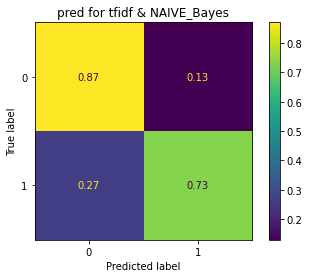

In [408]:
# Param optimization Bayes und hot one encoded
nb=MultinomialNB(fit_prior=True)
cvs = cross_val_score(nb, trainzusammen_he, y_train).mean()
nb.fit(trainzusammen_he, y_train)

score_Bay = nb.score(testzusammen_he, y_test)
s_predict = nb.predict(testzusammen_he)

print('Crossvalidation:', cvs, 'Test_Score', score_Bay)
#print(pred_scores(nb))

plot_confusion_matrix(nb,testzusammen_he,y_test, normalize='true')
plt.title('pred for tfidf & NAIVE_Bayes')

In [430]:

#nb.predict(testzusammen_he)
#df_predict=pd.DataFrame(nb.predict(testzusammen_he), columns=['predict'])
#df_predict=pd.concat([df_predict, y_test.reset_index(drop=True)],axis=1)
#df_predict=pd.concat([df_predict, df.clean.reset_index(drop=True)],axis=1)
#df['predict']=nb.predict(X_he)

test_df = pd.concat([y_test, pd.DataFrame(nb.predict(testzusammen_he)).set_index(y_test.index)], axis=1)
test_df.rename(columns={0:'predict'},inplace=True)
test_df=pd.concat([test_df,df.clean],axis=1,join='inner')
test_df[(test_df.target ==1) & (test_df.predict ==0)]

,target,predict,clean
6837,1,0,hollywood movi trap miner releas chile hollywo...
6167,1,0,thu aug gmt utc millcityio theramin siren
2905,1,0,drown demon know swim
5020,1,0,look like mudslid poor thing greatbritishbakeoff
6818,1,0,bomb head explos decis dat produc dead childre...
...,...,...,...
4671,1,0,potenti storm surg flood map nation hurrican c...
3656,1,0,policylab cecanf last public hear nyc today to...
2015,1,0,glaucoma occur fluid build pressur insid eye l...
7271,1,0,whirlwind medusa audio snake microphon input r...


In [410]:
i=6167
print(test_df.loc[i,'clean'],"\n")
print(df.loc[i,'text'])

thu aug gmt utc millcityio theramin siren 

Thu Aug 06 2015 01:20:32 GMT+0000 (UTC)
#millcityio #20150613
theramin sirens


In [412]:
#print(vectorizer.vocabulary_['sirens'])
print(vectorizer.vocabulary_['siren'])

12514


In [413]:
vectorizer.get_feature_names()[12514:12516]

['siren', 'sirensicebreak']

In [330]:
vectorizer.idf_[12639:12641]

array([5.70723437, 9.02142037])

In [414]:
trainzusammen_he.sirens.sum()

27

In [415]:
testzusammen_he.sirens.sum()

2

In [416]:
trainzusammen_he[trainzusammen_he.sirens==1].count()

ablaze                 27
accident               27
aftershock             27
airplane%20accident    27
ambulance              27
                       ..
16376                  27
16377                  27
16378                  27
16379                  27
16380                  27
Length: 16603, dtype: int64

In [417]:
trainzusammen_he[trainzusammen_he.siren==1].count()

ablaze                 34
accident               34
aftershock             34
airplane%20accident    34
ambulance              34
                       ..
16376                  34
16377                  34
16378                  34
16379                  34
16380                  34
Length: 16603, dtype: int64

In [333]:
stemmer.stem('sirens')

'siren'

In [ ]:
#trainzusammen_he.loc[:,trainzusammen_he.columns.str.startswith('sir')]
#df.loc[:,df.columns.str.startswith("foo")]
for i,c in enumerate(trainzusammen_he.columns):
  print(c)
  if i>200:
    break

Redo complete TFidf

In [418]:
X=df_he.clean.copy()
y=df.target
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify = y, test_size=0.2, random_state=42)
print(X_train.shape, y_train.shape, X_test.shape,y_test.shape)

(6090,) (6090,) (1523,) (1523,)


In [419]:
Tfidf_vec = TfidfVectorizer(max_features=20000)

Tfidf_vec.fit_transform(X_train)
#X_test_tfv = vectorizer.transform(X_test.iloc[:,firstcol])

<6090x16217 sparse matrix of type '<class 'numpy.float64'>'
	with 65861 stored elements in Compressed Sparse Row format>

In [421]:
#print(Tfidf_vec.vocabulary_['sirens'])
print(Tfidf_vec.vocabulary_['siren'])

12514


In [423]:
X_train[X_train.str.find('siren')!=-1]

6176    sirensicebreak one fantasi work divers heroin ...
6134    heal reviv side game rather better attack sire...
6192                           sleep siren vai vir pra sp
6187    connor franta damn siren hope everyon okay dan...
6152    siren song pc account got hack someon tri pull...
6154             real question tornado siren go dyersburg
6151       pharma overload loud cri like emerg siren fuck
200     happen hatzolah em ambul respond dual siren ht...
6141    appar go ww siren announc someth sure fun dull...
6156                      siren test complet test conclud
6173    rapper stop sampl polic siren start sampl whal...
6175                              ouvindo sleep siren awn
6166    reason gone warp today toni play issu show sle...
6177    kiro seattl saw bomb squad car head north elli...
6126      made weird high pitch nois heard siren ofnsixjk
6150    envyseven beauti aquariu queenmi siren cliff p...
6163              fevwarrior screech siren accompani walk
1196    gemini

In [426]:
pd.concat([X_train[X_train.str.find('siren')!=-1],y_train],join='inner',axis=1)

,clean,target
6176,sirensicebreak one fantasi work divers heroin ...,0
6134,heal reviv side game rather better attack sire...,0
6192,sleep siren vai vir pra sp,0
6187,connor franta damn siren hope everyon okay dan...,1
6152,siren song pc account got hack someon tri pull...,0
6154,real question tornado siren go dyersburg,1
6151,pharma overload loud cri like emerg siren fuck,0
200,happen hatzolah em ambul respond dual siren ht...,0
6141,appar go ww siren announc someth sure fun dull...,0
6156,siren test complet test conclud,0
